## Load Libraries

In [1]:
import pandas as pd
from fbprophet import Prophet

## Load Data



In [2]:
df = pd.read_csv('/content/BeerWineLiquor.csv')

In [3]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


### Format the Data

In [4]:
#Se llama así a las columnas, porque la librería de prophet lo requiere
#Fecha debe de ser "ds" y la otra es #"y"
#Prophet usa una frecuencia diaria por default
df.columns = ['ds','y']

In [5]:
df['ds'] = pd.to_datetime(df['ds'])

In [6]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


## Create and Fit Model

In [7]:
#Creamos el modelo
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Pronósticos del futuro

### Paso 1: Crear el dataframe donde colocaremos los resultados



In [8]:
#El data frame lo creamos con la librería pro´het
#Usando "make_future_dataframe#Colocamos los periodos a pronosticar
# y la frecuencia que queremos"
future = m.make_future_dataframe(periods=24,freq = 'MS')

In [9]:
#Vemos nuestro data frame
future.head()
#De momento solo tenemos fechas

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [10]:
df.head()
#Las fechas que tenemos son las mismas

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [11]:
#Vemos donde terminan los datasets
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [12]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01



### Paso 2: Calcular los pronósticos y guardarlos en forecast

In [13]:
#Calculamos y guardamos los pronosticos
forecast = m.predict(future)

In [14]:
forecast.head()
#En la columna de "y-hat"_ estan las predicciones

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1765.609137,1141.961547,1465.543440,1765.609137,1765.609137,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,0.0,0.0,0.0,1304.176066
1,1992-02-01,1768.666905,1185.764791,1517.079491,1768.666905,1768.666905,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,0.0,0.0,0.0,1341.969954
2,1992-03-01,1771.527398,1428.097300,1745.822948,1771.527398,1771.527398,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,0.0,0.0,0.0,1592.876098
3,1992-04-01,1774.585166,1418.163138,1744.645254,1774.585166,1774.585166,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,0.0,0.0,0.0,1578.438018
4,1992-05-01,1777.544296,1655.710782,1979.344126,1777.544296,1777.544296,44.823220,44.823220,44.823220,44.823220,44.823220,44.823220,0.0,0.0,0.0,1822.367516


In [15]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5201.232291,5084.173486,5394.526589,5189.402391,5212.169380,39.473660,39.473660,39.473660,39.473660,39.473660,39.473660,0.0,0.0,0.0,5240.705951
344,2020-09-01,5217.295945,4924.270129,5253.814404,5204.481223,5229.354174,-133.727623,-133.727623,-133.727623,-133.727623,-133.727623,-133.727623,0.0,0.0,0.0,5083.568322
345,2020-10-01,5232.841416,5024.076760,5347.641554,5218.956111,5245.833189,-43.568316,-43.568316,-43.568316,-43.568316,-43.568316,-43.568316,0.0,0.0,0.0,5189.273100
346,2020-11-01,5248.905070,5167.179399,5499.846253,5233.734574,5262.899816,87.524399,87.524399,87.524399,87.524399,87.524399,87.524399,0.0,0.0,0.0,5336.429469
347,2020-12-01,5264.450542,6182.714788,6492.871298,5248.067395,5280.219206,1070.542133,1070.542133,1070.542133,1070.542133,1070.542133,1070.542133,0.0,0.0,0.0,6334.992675


In [16]:
#Para ver todas las columnas del data frame
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4629.426372,4474.405155,4797.096465
337,2020-02-01,4680.226146,4515.489708,4841.597061
338,2020-03-01,4943.299086,4774.189846,5101.137756
339,2020-04-01,4941.866893,4783.976577,5107.746998
340,2020-05-01,5198.382732,5038.975571,5363.398753
341,2020-06-01,5178.976562,5013.967892,5335.462549
342,2020-07-01,5311.178497,5152.033441,5479.266296
343,2020-08-01,5240.705951,5084.173486,5394.526589
344,2020-09-01,5083.568322,4924.270129,5253.814404
345,2020-10-01,5189.273100,5024.076760,5347.641554


### Graficando los pronósticos


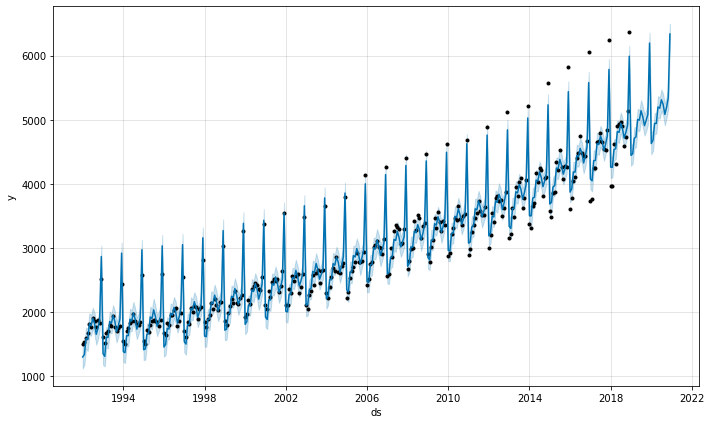

In [ ]:
#Hacmeos un plot de forecast
m.plot(forecast);
#Los puntos negros son los datos
#Lo demás es el pronostico del modelo

In [18]:
pd.plotting.register_matplotlib_converters()

(735234.0, 738156.0)

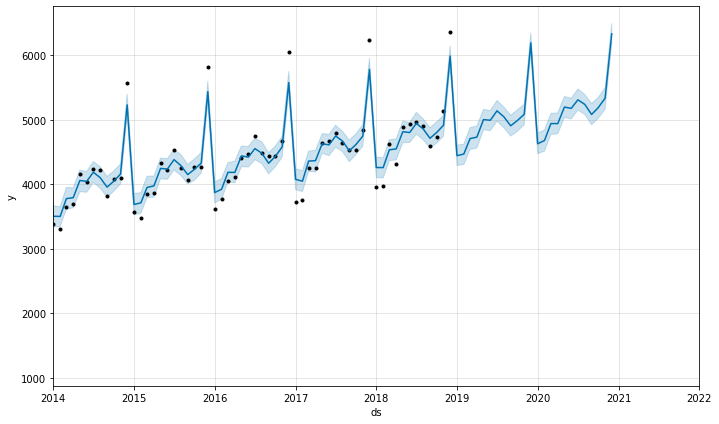

In [19]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2014-01-01','2022-01-01')

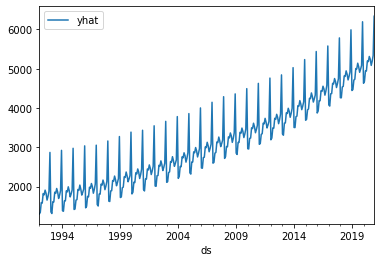

In [20]:
#Graficando el modelo de predicción
forecast.plot(x='ds',y='yhat')
plt.show()

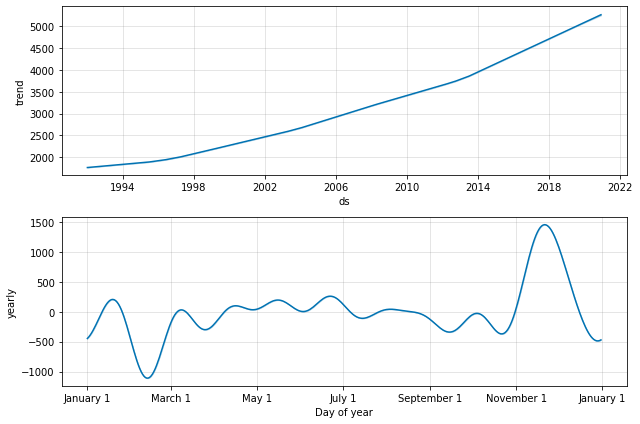

In [21]:
#Los componentes del modelo de pronostico
m.plot_components(forecast);
#Vemos el componente de tendencia y de tendencia anual
